# Homeostasis à-la-SparseNet on the activation probability

In this notebook, we test the convergence of SparseNet as a function of different learning parameters. This shows the relative robusteness of this method according to the coding parameters, but also the importance of homeostasis to obtain an efficient set of filters.

See also :
* http://blog.invibe.net/posts/2015-05-05-reproducing-olshausens-classical-sparsenet.html for a description of how SparseNet is implemented in the scikit-learn package
* http://blog.invibe.net/posts/2015-05-06-reproducing-olshausens-classical-sparsenet-part-2.html for a descrtiption of how we managed to implement the homeostasis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

In [3]:
from shl_scripts import SHL_set
tag = 'HAP'
experiments = SHL_set({})

In [4]:
%%writefile {experiments.shl.data_cache}/{tag}.py

import numpy as np
np.set_printoptions(precision=2, suppress=True)

try:
    import sys
    command = sys.argv[1]
except:
    command = 'run'

from shl_scripts.shl_experiments import SHL_set
tag = 'HAP'
opts = dict(homeo_method=tag, verbose=0)

n_jobs = 10
n_jobs = 1
n_jobs = 4
n_jobs = 9



experiments = SHL_set(opts, tag=tag)

variables = ['eta']
variables = ['eta', 'alpha_homeo']
variables = ['eta', 'eta_homeo', 'l0_sparseness', 'alpha_homeo']


list_figures = ['show_dico']
list_figures = []


display_variables = ['error', 'logL', 'perror', 'aerror', 'MI', 'cputime']
display_variables = ['F']


if command == 'run':
    experiments.run(variables=variables, n_jobs=n_jobs)

if command == 'plot':
    import matplotlib.pyplot as plt
    for variable in variables:
        experiments = SHL_set(opts, tag=tag)
        experiments.scan(variable=variable, list_figures=list_figures, display='')
        plt.show()

        for display_variable in display_variables:
            print('Time evolution of ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='dynamic', display_variable=display_variable)
            plt.show()
        plt.show()

        for display_variable in display_variables:
            print('Comparison at the end of learning for ', display_variable)
            fig, ax = experiments.scan(variable=variable, list_figures=[], display='final', 
                                       label=tag, display_variable=display_variable)
            plt.show()
        

Overwriting data_cache/HAP.py


In [5]:
%run {experiments.shl.data_cache}/{tag}.py load

In [6]:
!ls -l {experiments.shl.data_cache}/{tag}*
!rm -fr {experiments.shl.data_cache}/{tag}*lock*

-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 22:54 data_cache/HAP - alpha_homeo=0.04944_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 22:55 data_cache/HAP - alpha_homeo=0.05576_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 22:55 data_cache/HAP - alpha_homeo=0.06289_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 22:56 data_cache/HAP - alpha_homeo=0.07093_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 22:56 data_cache/HAP - alpha_homeo=0.08000_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 23:03 data_cache/HAP - alpha_homeo=0.09023_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 23:03 data_cache/HAP - alpha_homeo=0.10176_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 23:04 data_cache/HAP - alpha_homeo=0.11477_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 23:04 data_cache/HAP - alpha_homeo=0.12944_dico.pkl
-rw-r--r--  1 laurentperrinet  staff  1954297 May 17 23

In [7]:
%run {experiments.shl.data_cache}/{tag}.py run

DEBUG: eta 0.007 [0.004326248586243765, 0.004879306646571945, 0.005503066427339067, 0.006206566280269105, 0.007, 0.007894864533352806, 0.00890412657142743, 0.010042410438463819, 0.011326210000000001]
DEBUG: eta_homeo 0.02 [0.012360710246410759, 0.013940876133062701, 0.015723046935254475, 0.017733046515054585, 0.02, 0.022556755809579446, 0.0254403616326498, 0.02869260125275377, 0.0323606]
DEBUG: l0_sparseness 21 [12, 14, 16, 18, 21, 23, 26, 30, 33]
DEBUG: alpha_homeo 0.08 [0.049442840985643034, 0.055763504532250804, 0.0628921877410179, 0.07093218606021834, 0.08, 0.09022702323831779, 0.1017614465305992, 0.11477040501101508, 0.1294424]
Running variable eta with value 0.004326248586243765
Running variable eta with value 0.004879306646571945
Running variable eta with value 0.005503066427339067
Running variable eta with value 0.006206566280269105
Running variable eta with value 0.007
Running variable eta with value 0.007894864533352806
Running variable eta with value 0.00890412657142743
Runn

[Parallel(n_jobs=9)]: Done   1 tasks      | elapsed:    3.2s
[Parallel(n_jobs=9)]: Done   2 tasks      | elapsed:    3.3s


Running variable eta_homeo with value 0.013940876133062701


[Parallel(n_jobs=9)]: Done   3 tasks      | elapsed:    3.6s


Running variable eta_homeo with value 0.015723046935254475
Running variable eta_homeo with value 0.017733046515054585


[Parallel(n_jobs=9)]: Done   4 tasks      | elapsed:    4.0s
[Parallel(n_jobs=9)]: Done   5 tasks      | elapsed:    4.1s


Running variable eta_homeo with value 0.02
Running variable eta_homeo with value 0.022556755809579446
Running variable eta_homeo with value 0.0254403616326498


[Parallel(n_jobs=9)]: Done   6 tasks      | elapsed:    4.2s
[Parallel(n_jobs=9)]: Done   7 tasks      | elapsed:    4.3s
[Parallel(n_jobs=9)]: Done   8 tasks      | elapsed:    4.3s
[Parallel(n_jobs=9)]: Done   9 tasks      | elapsed:    4.3s
[Parallel(n_jobs=9)]: Done  10 tasks      | elapsed:    4.4s


Running variable eta_homeo with value 0.02869260125275377
Running variable eta_homeo with value 0.0323606
Running variable l0_sparseness with value 12.0


[Parallel(n_jobs=9)]: Done  11 tasks      | elapsed:    4.5s
[Parallel(n_jobs=9)]: Done  12 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  13 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  14 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  15 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  16 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  17 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  18 tasks      | elapsed:    4.6s
[Parallel(n_jobs=9)]: Done  19 tasks      | elapsed:    4.6s


Running variable l0_sparseness with value 14.0
Running variable l0_sparseness with value 16.0
Running variable l0_sparseness with value 18.0


[Parallel(n_jobs=9)]: Done  22 out of  36 | elapsed:    5.5s remaining:    3.5s


Running variable l0_sparseness with value 21.0
Running variable l0_sparseness with value 23.0
Running variable l0_sparseness with value 26.0
Running variable l0_sparseness with value 30.0


[Parallel(n_jobs=9)]: Done  25 out of  36 | elapsed:    6.1s remaining:    2.7s


Running variable l0_sparseness with value 33.0
Running variable alpha_homeo with value 0.049442840985643034


[Parallel(n_jobs=9)]: Done  28 out of  36 | elapsed:    6.8s remaining:    1.9s


Running variable alpha_homeo with value 0.055763504532250804
Running variable alpha_homeo with value 0.0628921877410179
Running variable alpha_homeo with value 0.07093218606021834
Running variable alpha_homeo with value 0.08
Running variable alpha_homeo with value 0.09022702323831779


[Parallel(n_jobs=9)]: Done  31 out of  36 | elapsed:    8.1s remaining:    1.3s


Running variable alpha_homeo with value 0.1017614465305992
Running variable alpha_homeo with value 0.11477040501101508
Running variable alpha_homeo with value 0.1294424


[Parallel(n_jobs=9)]: Done  34 out of  36 | elapsed:    8.3s remaining:    0.5s
[Parallel(n_jobs=9)]: Done  36 out of  36 | elapsed:    8.5s finished


Time evolution of  F


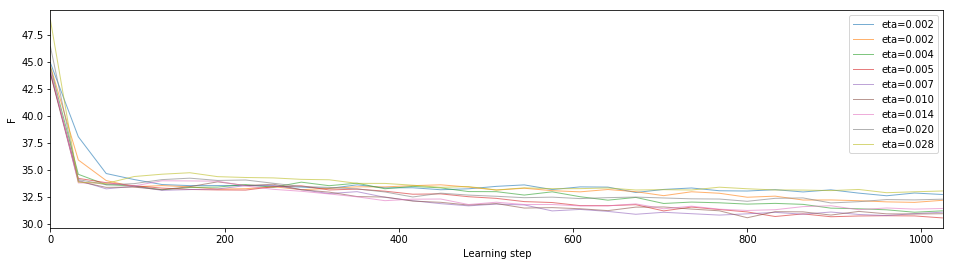

Comparison at the end of learning for  F


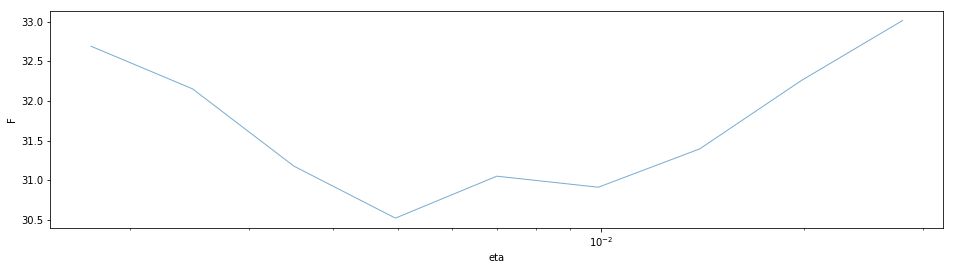

Time evolution of  F


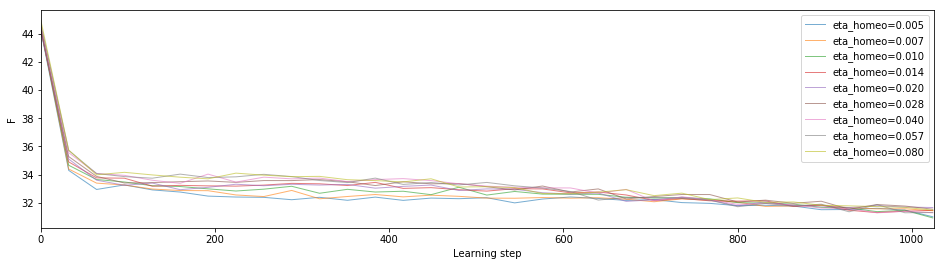

Comparison at the end of learning for  F


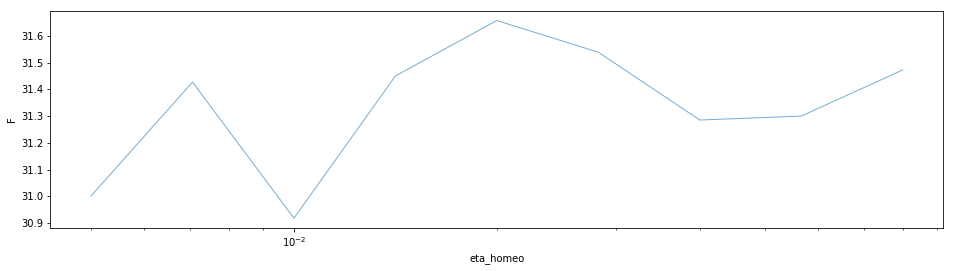

Time evolution of  F


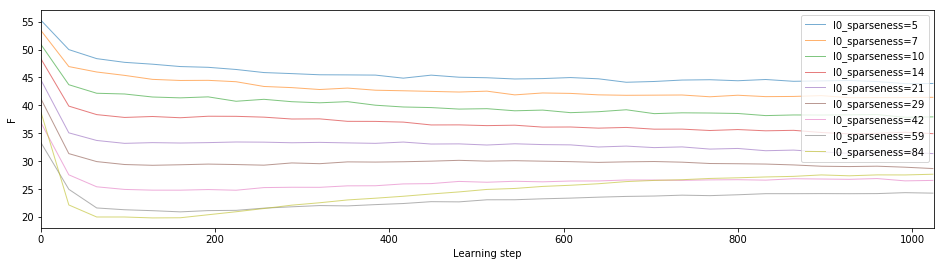

Comparison at the end of learning for  F


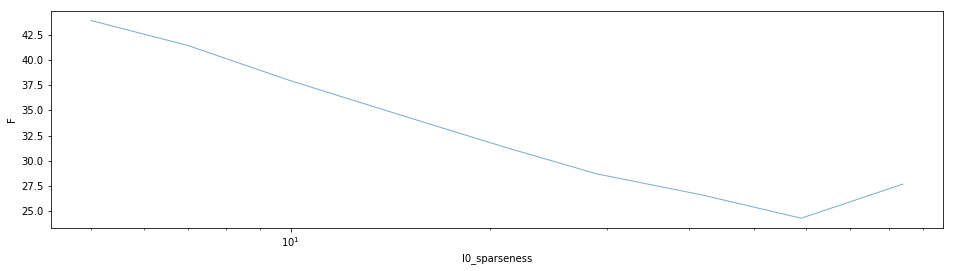

Time evolution of  F


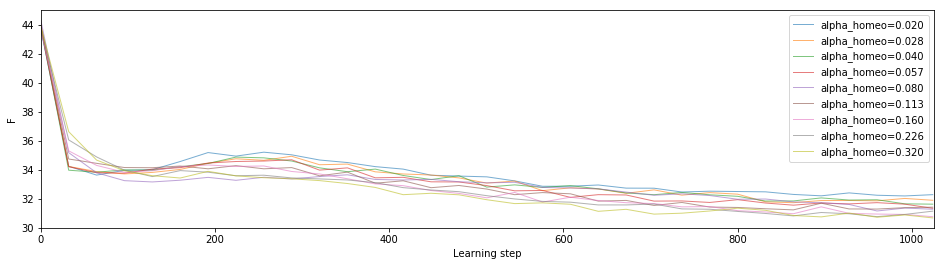

Comparison at the end of learning for  F


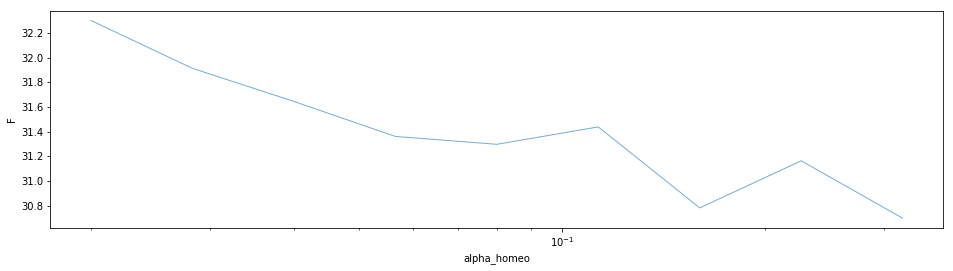

In [8]:
%run {experiments.shl.data_cache}/{tag}.py plot

## Version used

In [9]:
%load_ext version_information
%version_information numpy, shl_scripts, pandas

Software versions
Python 3.6.5 64bit [GCC 4.2.1 Compatible Apple LLVM 9.1.0 (clang-902.0.39.1)]
IPython 6.4.0
OS Darwin 17.5.0 x86_64 i386 64bit
numpy 1.14.3
shl_scripts 20171221
pandas 0.22.0
Fri May 18 12:13:18 2018 CEST